# Breast Cancer Prediction

Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

In this project a machine learning model is created for detecting the cancer.Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

For this project breast cancer dataset is used which is obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

# Content
 **1. Data Understanding**<br>
 **2. Exploratory data analysis**<br>
**3. Data preparation** <br>
**4. Model building**<br>
**5. Model testing**<br>

# 1. Data Understanding

In [1]:
#Importing requiried libraries

# Data wrangling
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [2]:
#loading dataset
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

Data set contains 33 coluns and 569 observations

In [4]:
#Columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**Attribute Information:**<br>

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:<br>

1)  radius (mean of distances from center to points on the perimeter)<br>
2)  texture (standard deviation of gray-scale values)<br>
3)  perimeter<br>
4) area<br>
5) smoothness (local variation in radius lengths)<br>
6) compactness (perimeter^2 / area - 1.0)<br>
7) concavity (severity of concave portions of the contour)<br>
8) concave points (number of concave portions of the contour)<br>
9) symmetry<br>
10) fractal dimension ("coastline approximation" - 1)<br>

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#checking for null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#dropping the feature - Unnamed: 32 as it contains null values
df.drop('Unnamed: 32',inplace=True,axis = 1)

In [8]:
#dropping id column as it is not requiried
df.drop('id',inplace=True,axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# 2. Exploratory data analysis

B    62.7
M    37.3
Name: diagnosis, dtype: float64


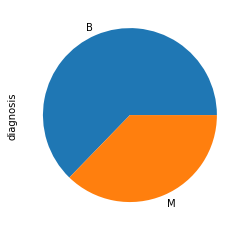

In [10]:
#understanding data imbalance
print(round(df['diagnosis'].value_counts(normalize=True),3)*100)
df['diagnosis'].value_counts(normalize=True).plot(kind = 'pie')
plt.show()

63% of data is Benign and 37% of data is malignant.

<function matplotlib.pyplot.show(close=None, block=None)>

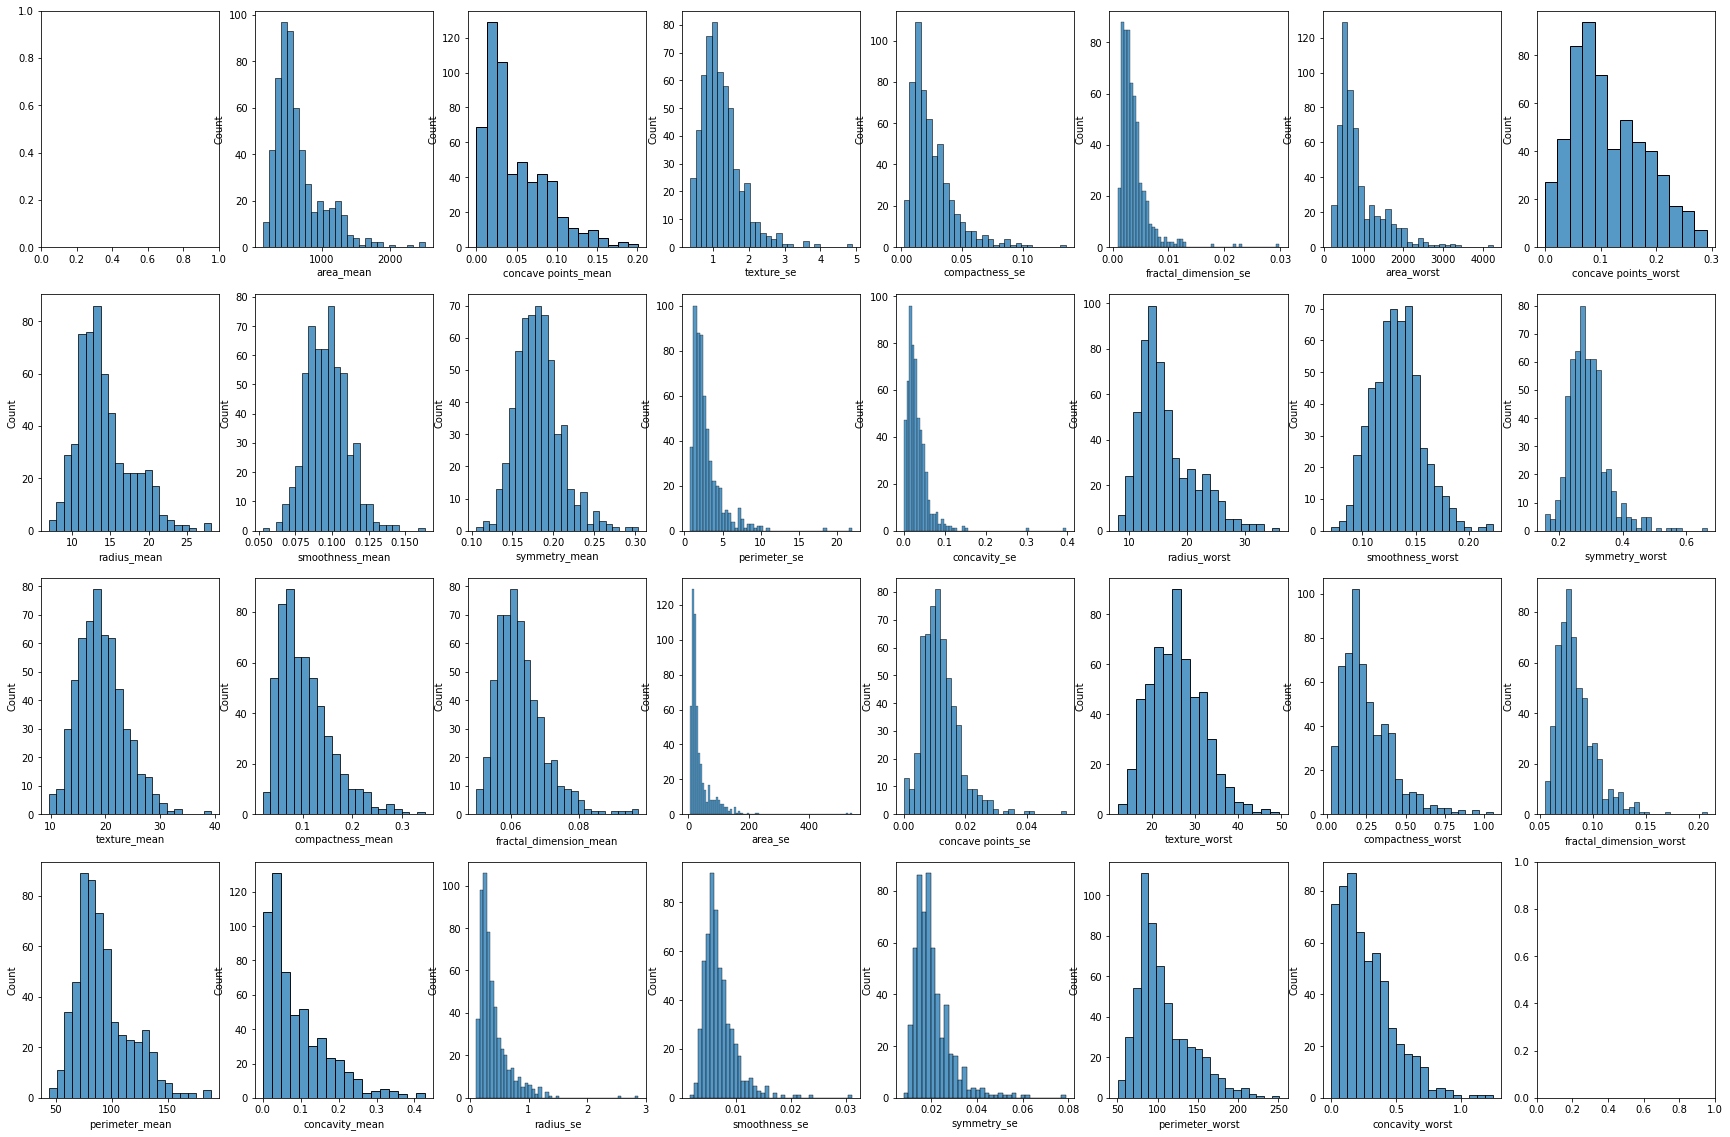

In [11]:
#Univariate analysis
#Distribution of numeric features 
f, axes = plt.subplots(4,8 , figsize=(30, 20), sharex = False)
for i,col in enumerate(df.columns.tolist()):
    if col != 'diagnosis':
        sns.histplot(df[col],ax=axes[i%4, i//4])
plt.show

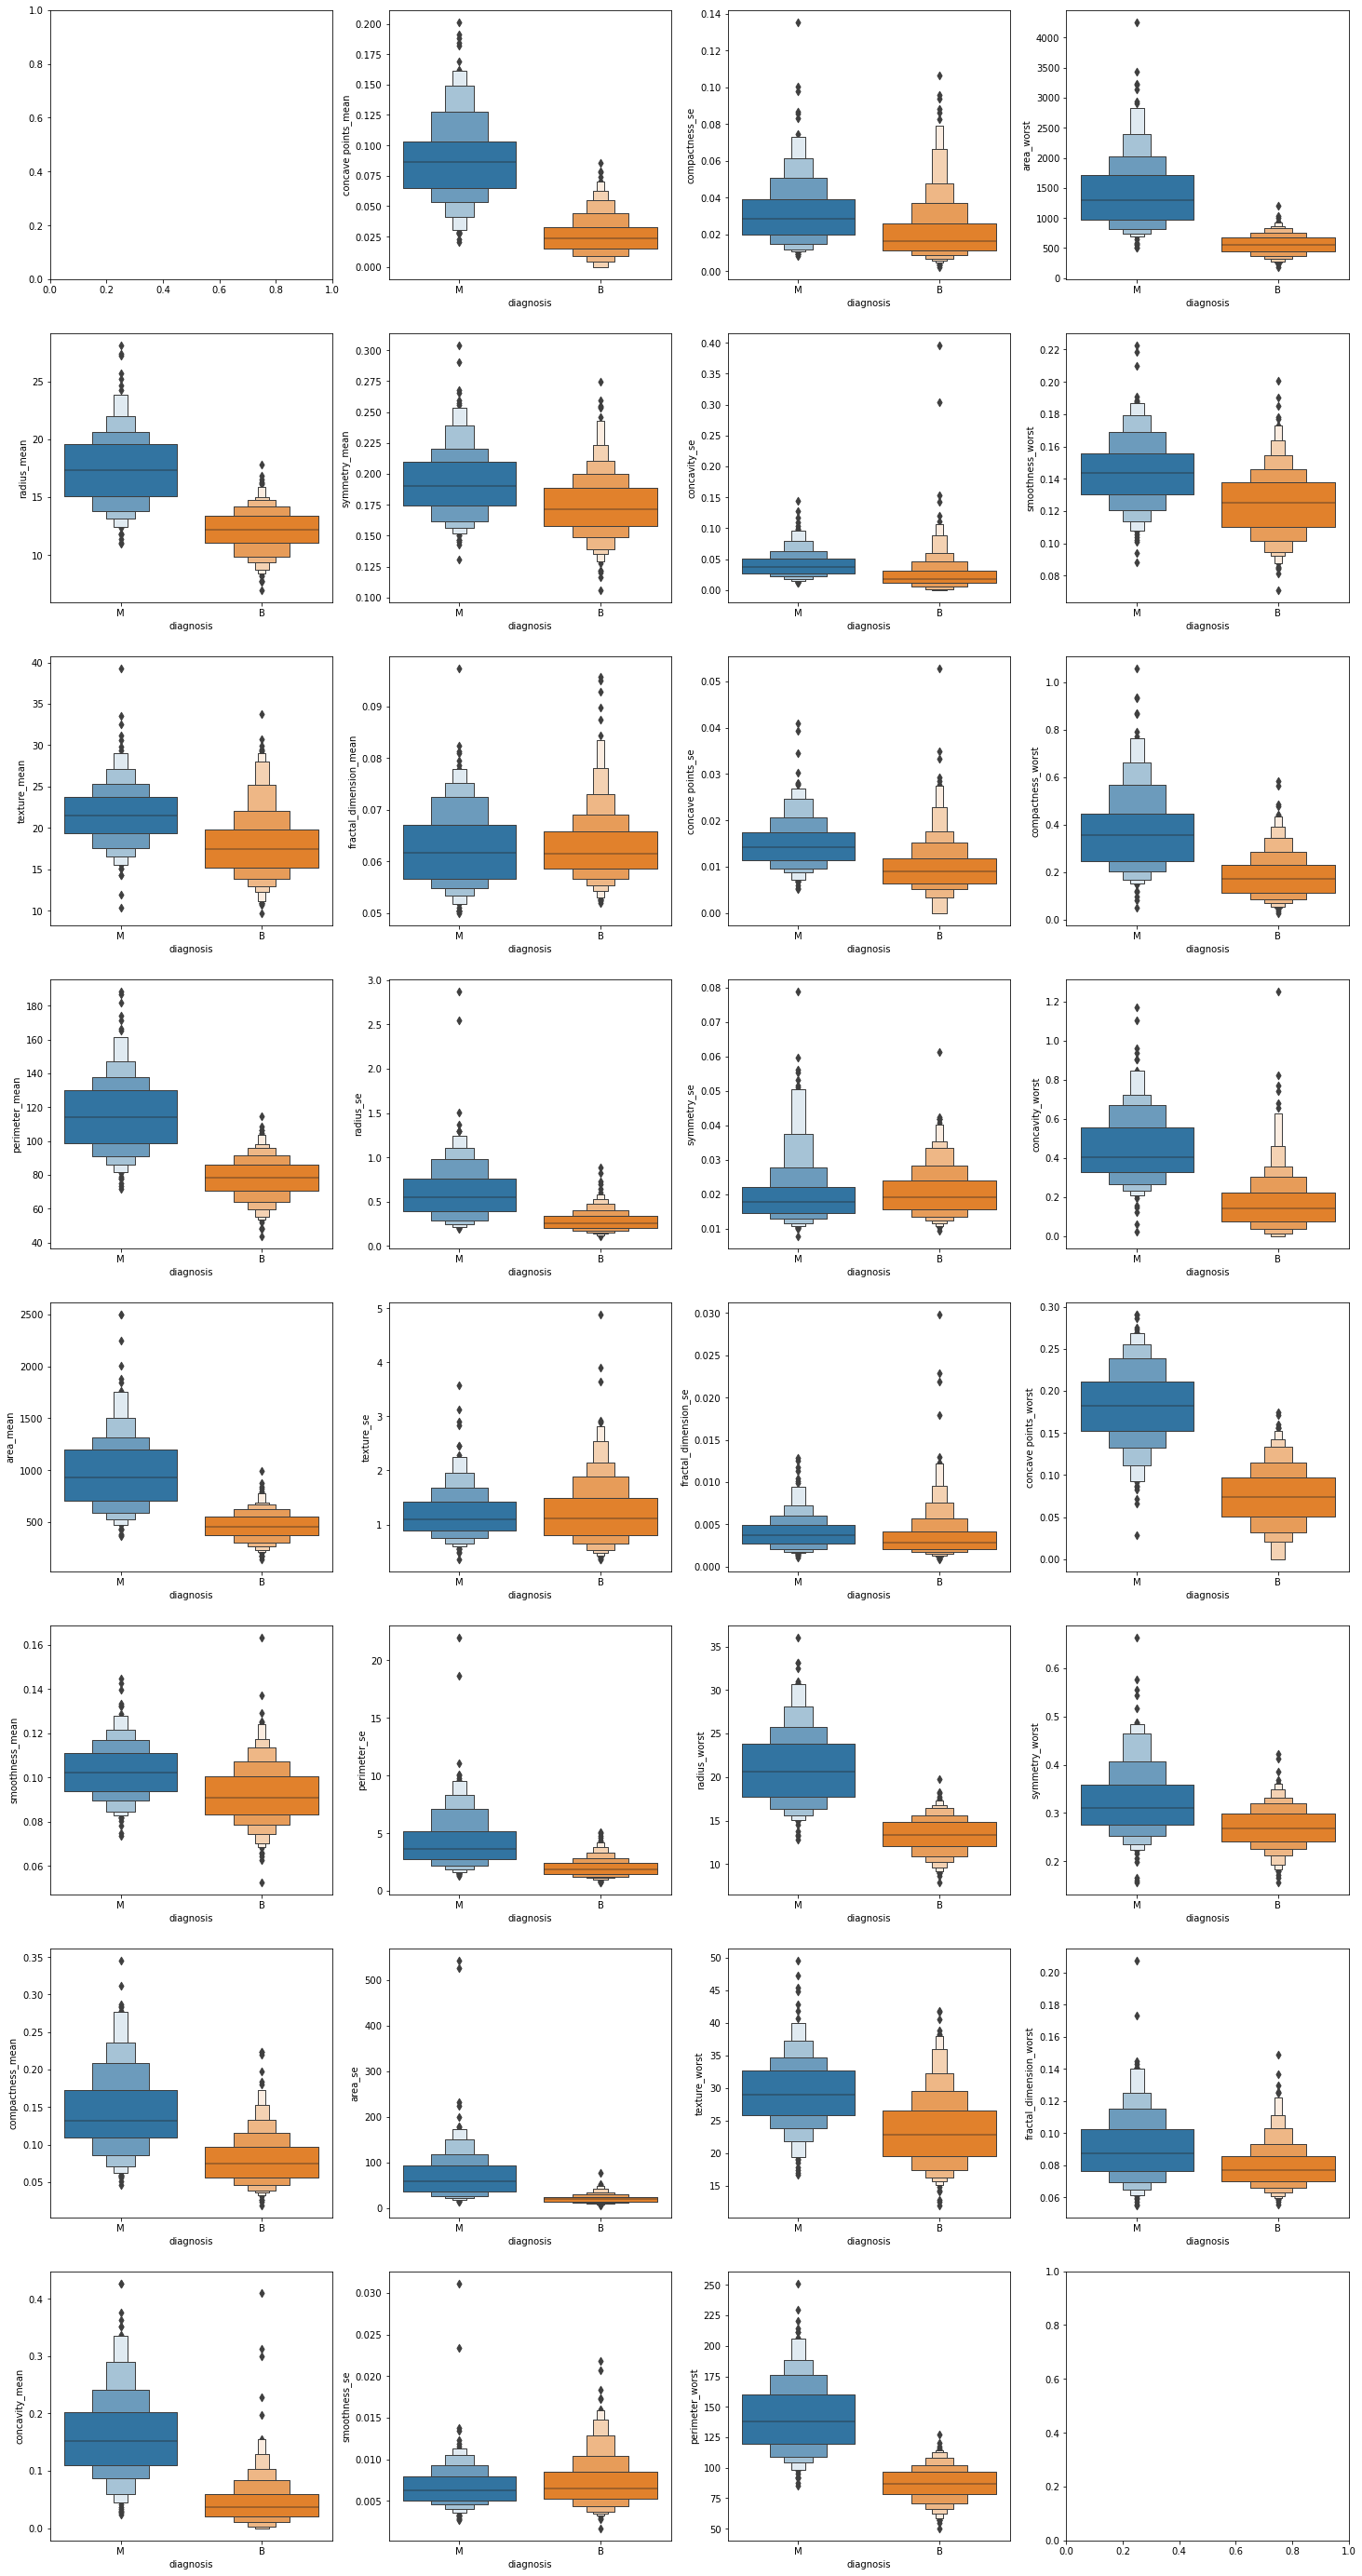

In [12]:
#Bivariate analysis
#How features effect the tumor type 
f, axes = plt.subplots(8,4 , figsize=(25, 50), sharex = False)
for i,col in enumerate(df.columns.tolist()):
    if col != 'diagnosis':
        sns.boxenplot(x = 'diagnosis' , y = col, data = df,ax=axes[i%8, i//8])

**Comments:** Higher the feature value higher the chances of malignant tumor

<AxesSubplot:>

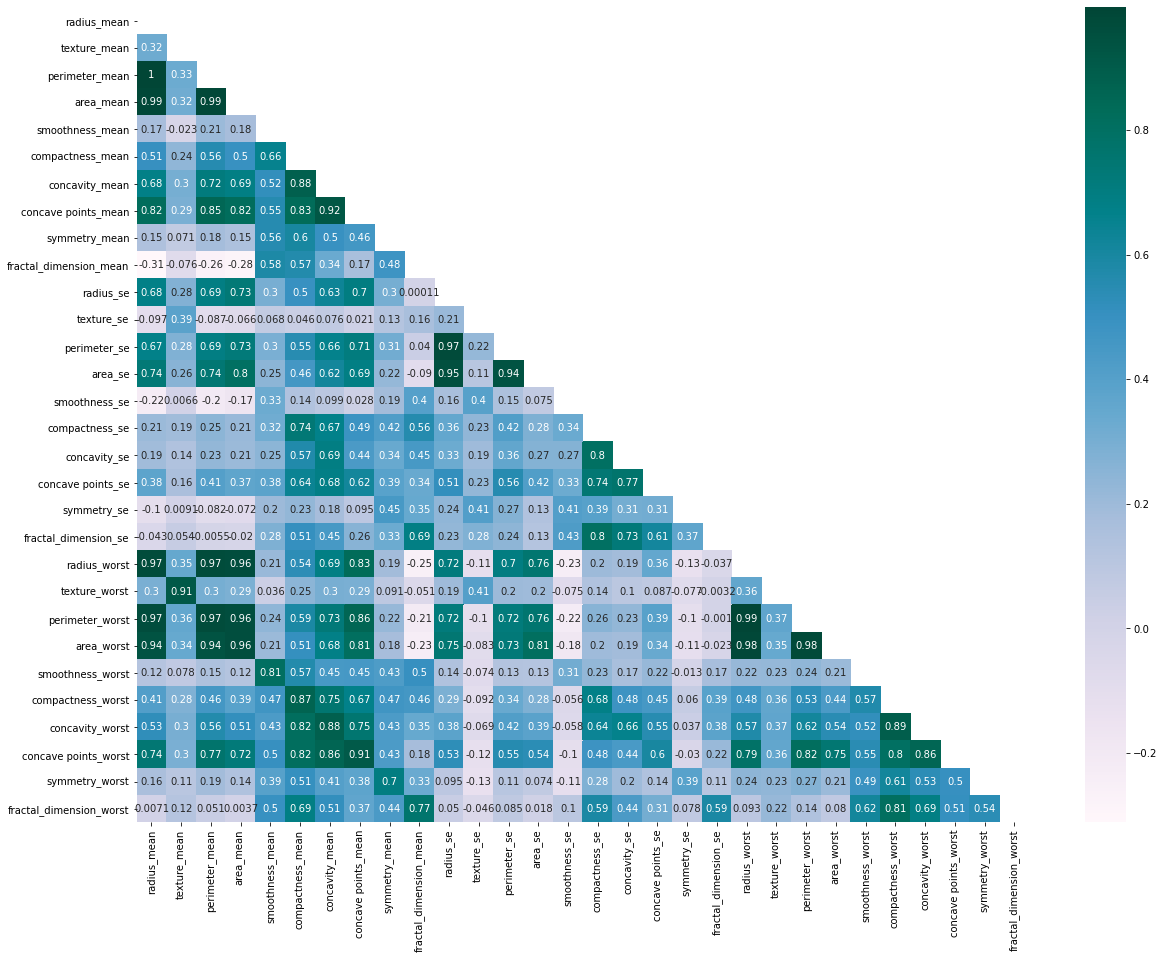

In [14]:
#Corelation matrix
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),annot=True,cmap='PuBuGn',mask = mask)

**Dropping the highly corelated features**<br>
**From the above plot we can see <br>**
**`radius_mean` is highly corelated with `area_worst`,`perimeter_worst`,`radius_worst`,`area_mean`,`perimeter_mean`**<br>
**`radius_se` is highly corelated with `perimeter_se` and `area_se`**

In [15]:
df.drop(['area_worst','perimeter_worst','radius_worst','area_mean','perimeter_mean','perimeter_se','area_se','compactness_worst'],axis=1,inplace=True)

<AxesSubplot:>

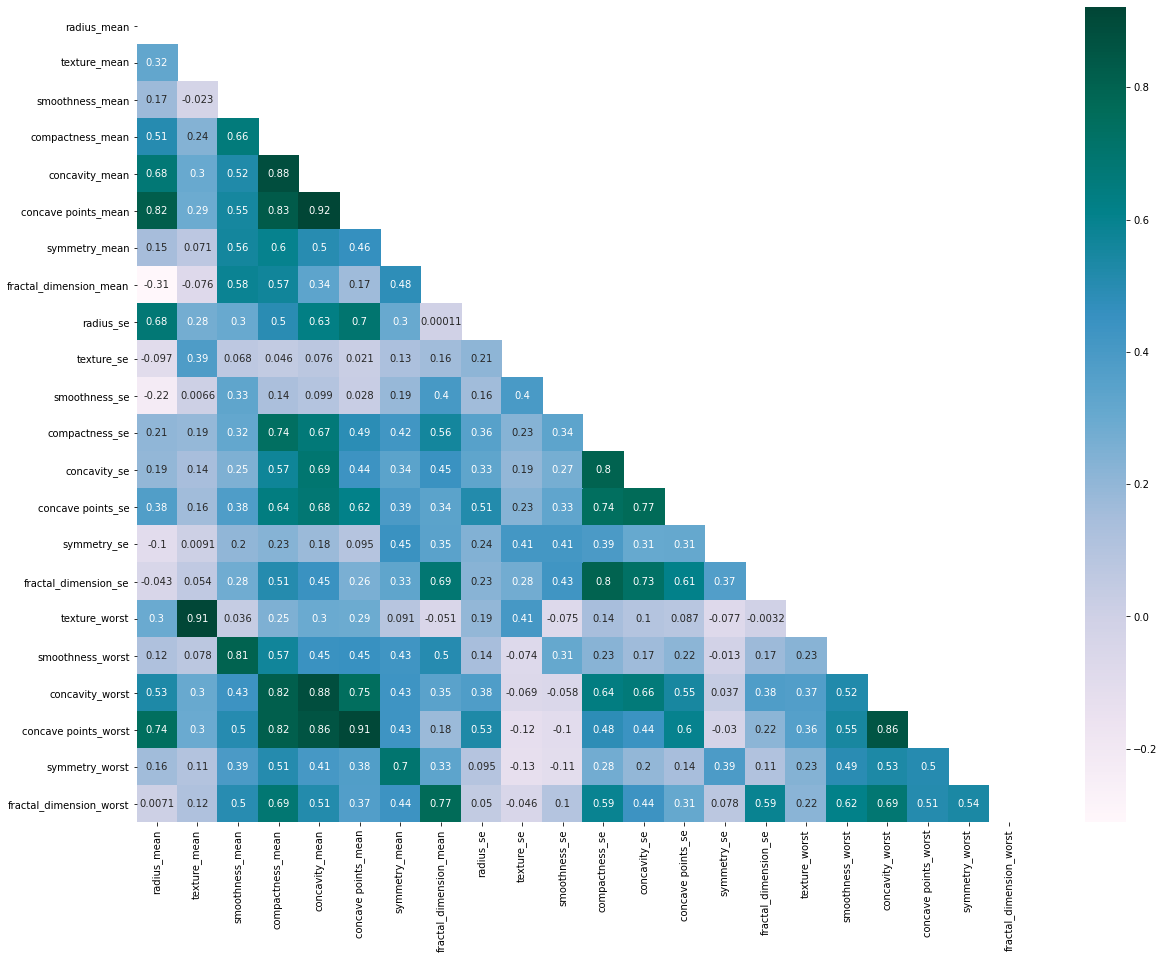

In [16]:
#Corelation matrix
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),annot=True,cmap='PuBuGn',mask = mask)

# 3. Data preparation

In [17]:
#Mapping the target variable with 0 and 1
df.diagnosis = df.diagnosis.map({'M':1,'B':0})
df.diagnosis.head()


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## Splitting the data into Train and teat sets

In [18]:
# Putting feature variable to X
X = df.drop('diagnosis', axis=1)
X.head()
print(X.shape)

(569, 22)


In [19]:
# Putting response variable to y
y = df['diagnosis']
print(y.shape)

(569,)


In [20]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [21]:
print(X_train.shape)
print(X_test.shape)

(455, 22)
(114, 22)


In [22]:
y_train

58     0
554    0
351    1
136    0
497    0
      ..
526    0
53     1
350    0
79     0
520    0
Name: diagnosis, Length: 455, dtype: int64

## Feature Scaling

In [23]:
#Scaling the date into rage 0-1 as it helps in faster convergence of results in gradient descent
columns = X_train.columns.tolist()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=columns)
X_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.287236,0.308997,0.252505,0.063386,0.001621,0.020711,0.450980,0.112073,0.105921,0.188693,...,0.002278,0.101883,0.261637,0.095387,0.263428,0.210079,0.001474,0.038271,0.207650,0.051489
1,0.279190,0.641522,0.258193,0.133073,0.145150,0.116451,0.300654,0.158012,0.036248,0.220960,...,0.128308,0.186308,0.169249,0.086783,0.627530,0.349997,0.194808,0.223665,0.191732,0.113997
2,0.415022,0.305882,0.647016,0.743168,0.682755,0.617296,0.781343,0.578562,0.148072,0.213004,...,0.327617,0.558191,0.887454,0.292973,0.315250,0.569381,0.548882,0.735446,0.636731,0.327693
3,0.223816,0.217647,0.473684,0.142353,0.084161,0.129225,0.165775,0.210608,0.122180,0.474673,...,0.087623,0.319560,0.106536,0.128030,0.350607,0.379882,0.083546,0.240028,0.034925,0.120622
4,0.259785,0.239792,0.330866,0.194918,0.084560,0.117744,0.276887,0.233023,0.015100,0.092999,...,0.044305,0.173496,0.139572,0.029419,0.319838,0.383278,0.161981,0.362728,0.349252,0.141480


In [24]:
X_train.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.332849,0.307141,0.392952,0.286628,0.200969,0.237807,0.441433,0.284216,0.103757,0.192075,...,0.102774,0.289868,0.238181,0.132336,0.353136,0.411314,0.209840,0.388529,0.310873,0.186799
std,0.163587,0.148093,0.122833,0.172656,0.175240,0.185266,0.155035,0.149494,0.094225,0.124101,...,0.088431,0.145667,0.150723,0.114497,0.163721,0.148179,0.159281,0.220327,0.136824,0.113344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223816,0.200346,0.305543,0.158277,0.068791,0.101218,0.333036,0.183311,0.044523,0.109673,...,0.049045,0.194902,0.136399,0.062859,0.231579,0.308565,0.087540,0.222287,0.222618,0.110357
50%,0.297648,0.292388,0.389636,0.249640,0.140933,0.168191,0.432561,0.257213,0.077349,0.172339,...,0.085221,0.269682,0.203778,0.106040,0.343860,0.405692,0.178994,0.343610,0.296983,0.162862
75%,0.407686,0.395329,0.471879,0.379152,0.284677,0.338444,0.530600,0.358189,0.127431,0.246818,...,0.131814,0.363447,0.298219,0.164292,0.458704,0.502479,0.300080,0.547365,0.377524,0.241506
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=columns)
X_test.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.517251,0.368166,0.635280,0.815766,0.747188,0.595427,0.625668,0.470262,0.105559,0.091606,...,0.202930,0.256968,0.149838,0.191403,0.412686,0.788766,0.721565,0.676542,0.399145,0.424767
1,0.348289,0.106920,0.419157,0.194713,0.134114,0.228777,0.603090,0.100311,0.148651,0.099872,...,0.077683,0.314425,0.275822,0.025868,0.119028,0.397541,0.130351,0.374440,0.355666,0.037256
2,0.623740,0.321107,0.248894,0.226902,0.270619,0.383996,0.515746,0.022193,0.174181,0.072069,...,0.087064,0.304890,0.262197,0.031605,0.284480,0.232493,0.208147,0.490872,0.354003,0.028139
3,0.193999,0.149827,0.433059,0.130299,0.055366,0.128380,0.300654,0.371283,0.034691,0.319307,...,0.047828,0.387042,0.428123,0.177107,0.116869,0.342525,0.031454,0.148329,0.080067,0.118654
4,0.247953,0.334256,0.514309,0.328128,0.191542,0.107654,0.632204,0.421216,0.025204,0.096292,...,0.130546,0.241907,0.099257,0.132856,0.315250,0.468858,0.282348,0.278608,0.271799,0.218746


## 4. Model Building

**1. Logistic Regression**<br>
**2. Logistic Regression with PCA**<br>

In [26]:
#Creating logistic regression
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [27]:
def Metrics(y_true, y_pred):
    sns.heatmap(confusion_matrix(y_true,y_pred),annot = True,fmt = 'd')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('CONFUSION MATRIX')
    plt.show()
    print('*'*55)
    print(classification_report(y_true,y_pred))


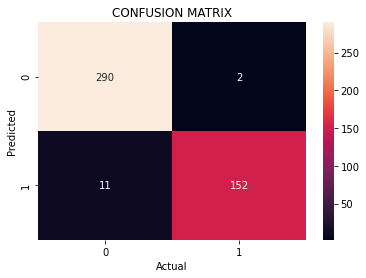

*******************************************************
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       292
           1       0.99      0.93      0.96       163

    accuracy                           0.97       455
   macro avg       0.98      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455



In [28]:
#Evaluating train data
Metrics(y_train,model1.predict(X_train))

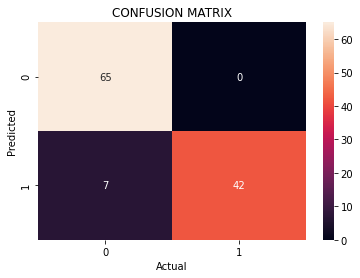

*******************************************************
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        65
           1       1.00      0.86      0.92        49

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [29]:
#Evaluating testing data
Metrics(y_test,model1.predict(X_test))


### Feature importance

In [30]:
#Top 10 most important features which affect the tpe of cancer
columns = X_train.columns
importance = model1.coef_.reshape(22,)
fe_imp = pd.DataFrame(index = columns)
fe_imp['Importance'] = np.abs(importance)
fe_imp = fe_imp.sort_values(by = 'Importance', ascending = False)
fe_imp.head(10)

,Importance
concave points_worst,3.471555
radius_mean,3.396346
concave points_mean,3.047909
texture_worst,2.302695
radius_se,1.924622
concavity_mean,1.879338
fractal_dimension_mean,1.793680
texture_mean,1.777018
smoothness_worst,1.413210
concavity_worst,1.388132


Text(0.5, 1.0, 'Feature Importance Plot')

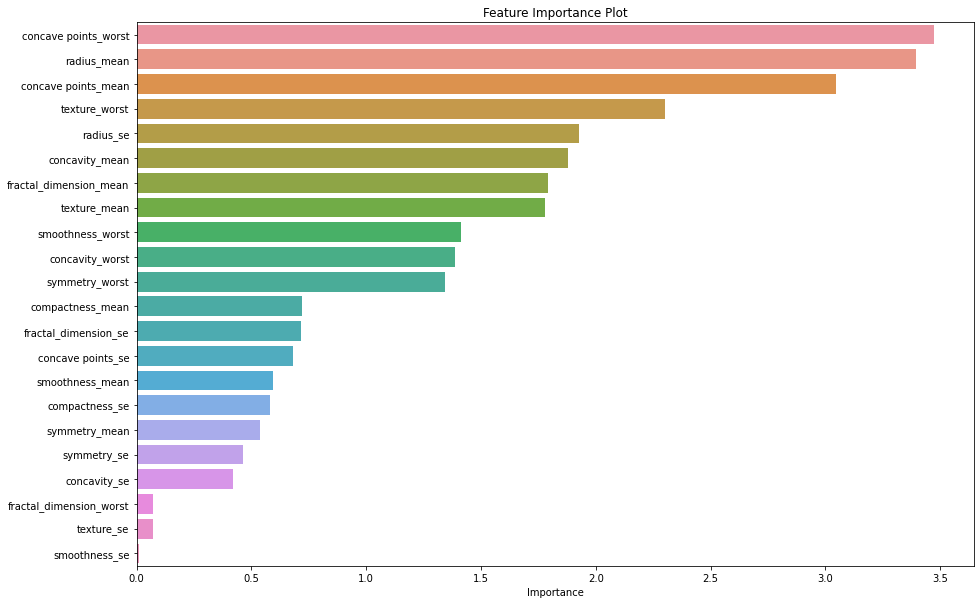

In [136]:
plt.figure(figsize=(15,10))
sns.barplot(x = fe_imp.Importance, y = fe_imp.index)
plt.title('Feature Importance Plot')

## Principal component analysis (Dimensionality Reduction)

In [31]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

<BarContainer object of 22 artists>

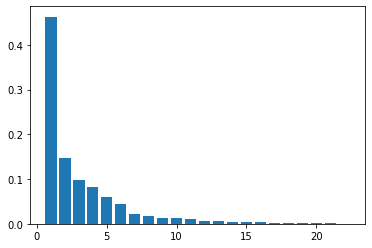

In [32]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

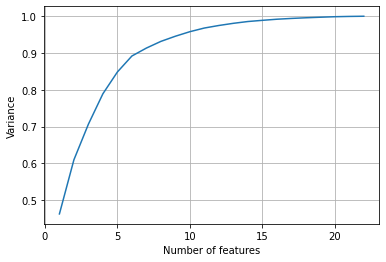

In [33]:
#variance cummulative plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.grid()
plt.xlabel('Number of features')
plt.ylabel('Variance')
plt.show()

From the above plot we can see 10 parameters are requiried for this model

In [34]:
#creating PCA data with 10 features
PCA_10 = PCA(n_components=10, random_state=42)
PCA_final = PCA_10.fit_transform(X_train)
PCA_final = pd.DataFrame(PCA_final)
PCA_final

,0,1,2,3,4,5,6,7,8,9
0,-0.652782,-0.049338,0.087236,0.074462,0.144519,0.037592,-0.084371,-0.013232,-0.076428,0.117751
1,-0.272865,-0.230048,0.395096,-0.169748,-0.127342,0.005914,0.063938,0.010639,-0.071450,0.119457
2,1.157174,0.552119,0.019402,0.143592,0.330777,0.158190,0.086098,0.212115,0.047752,-0.054868
3,-0.380705,-0.057643,0.125705,0.115388,-0.197237,-0.284375,-0.008234,-0.002404,0.234305,-0.099428
4,-0.299799,-0.130591,-0.146219,-0.099607,-0.068257,0.082995,0.040489,0.040403,0.025515,-0.075075
...,...,...,...,...,...,...,...,...,...,...
450,-0.019251,-0.069209,-0.263028,-0.294598,-0.022543,-0.025680,0.067617,0.013376,-0.041418,-0.089524
451,0.373719,-0.033681,-0.037847,0.138713,0.248073,-0.064389,-0.265313,0.090958,0.034632,0.024324
452,-0.612676,-0.040199,-0.056035,0.102993,0.080906,0.132270,-0.007355,0.019604,-0.079915,0.030552
453,-0.256578,-0.025454,-0.062593,-0.064942,-0.015164,-0.006212,-0.028016,-0.006298,0.005562,-0.019538


## Logistic regression with PCA

In [35]:
LR_PCA = LogisticRegression().fit(PCA_final,y_train)

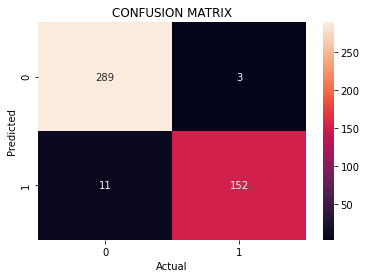

*******************************************************
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       292
           1       0.98      0.93      0.96       163

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455



In [36]:
#Evaluating train data
Metrics(y_train,LR_PCA.predict(PCA_final))

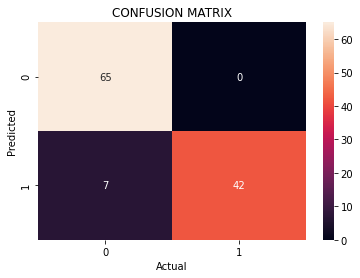

*******************************************************
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        65
           1       1.00      0.86      0.92        49

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [37]:
#Evaluating test data
Metrics(y_test,LR_PCA.predict(PCA_10.transform(X_test)))

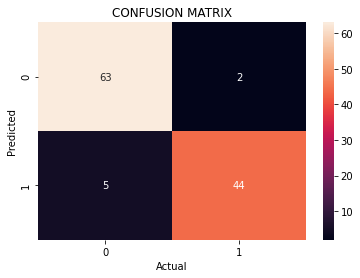

*******************************************************
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        65
           1       0.96      0.90      0.93        49

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [41]:
#Random Decision Tree
from sklearn.tree import DecisionTreeClassifier


dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= Metrics(y_test,prediction2)
cm2

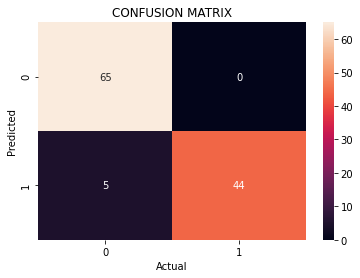

*******************************************************
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        65
           1       1.00      0.90      0.95        49

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [43]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
Metrics(y_test, prediction3)



In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [51]:
results =[]
names=[]
for name , model in models: 
    kfold=KFold(n_splits=10)
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)


    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)


KNN:, 0.955942, (0.026136)
NB:, 0.923043, (0.031510)
SVM:, 0.973623, (0.016452)


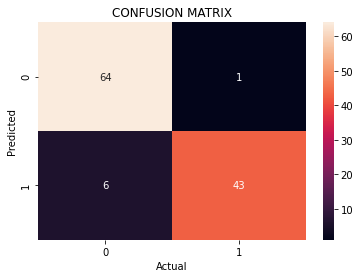

*******************************************************
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        65
           1       0.98      0.88      0.92        49

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [55]:
#KNN
from sklearn.neighbors import KNeighborsClassifier


KNN= KNeighborsClassifier()
model4 = KNN.fit(X_train, y_train)
prediction4 = model4.predict(X_test)
Metrics(y_test, prediction4)


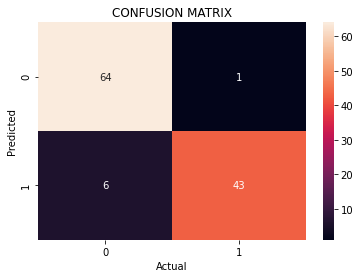

*******************************************************
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        65
           1       0.98      0.88      0.92        49

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [56]:
SVM = SVC()
SVM.fit(X_train, y_train)
model5 = SVM.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
Metrics(y_test, prediction5)


# Conclusion

**COMPARE THE METRICS FOR ALL THE MODELS**